# Packages, Libraries, and Constants
- Different packages, Libraries

- Different constants and parameters

In [1]:
from packages.common_packages import *

# Path to the datasets

1. Speech Intent Classification (SIC) Dataset
 - `emabega` - `ddyo` - `unknown` - `kkono`  - `yimirira` - `mu maaso` 

2. Datasets
- `Augmented train data` - `Original train data` - `Test data`


In [2]:
from packages.dataset_path import *

## Directory Labels

In [3]:
from packages.utils import list_directory_contents

In [4]:
train_commands = list_directory_contents(train_data_dir, 'Train')
test_commands = list_directory_contents(test_data_dir, 'Test')

Train commands labels: ['emabega' 'ddyo' 'unknown' 'kkono' 'yimirira' 'mumaaso']
Test commands labels: ['emabega' 'ddyo' 'unknown' 'kkono' 'yimirira' 'mumaaso']
New_Train commands labels: ['emabega' 'ddyo' 'unknown' 'kkono' 'yimirira' 'mumaaso']


# Dataset Pre-processing

## 1. Train and validation Datasets

- `Creating the Train and Validate Datasets`

In [6]:
from packages.data_processing import create_train_val_audio_dataset

In [7]:
train_ds, val_ds, label_names = create_train_val_audio_dataset(train_data_dir)
print(f'Labels: {label_names}')

Found 9985 files belonging to 6 classes.
Using 7988 files for training.
Using 1997 files for validation.
Audio Shape: (32, 16000)
Label Shape: (32,)
Labels: ['ddyo' 'emabega' 'kkono' 'mumaaso' 'unknown' 'yimirira']


## 2. Test dataset

In [8]:
from packages.data_processing import create_test_audio_dataset

In [9]:
test_ds = create_test_audio_dataset(test_data_dir)

Found 2608 files belonging to 6 classes.
Audio Shape: (32, 16000)
Label Shape: (32,)


# Data Processing

- `Feature Extraction`

In [11]:
from packages.data_processing import preprocess_melspec_audio_datasets

In [12]:
train_mel_spec_ds, val_mel_spec_ds, test_mel_spec_ds = preprocess_melspec_audio_datasets(train_ds, val_ds, test_ds)

### Shape consistency

In [13]:
print(train_mel_spec_ds.element_spec)
print(val_mel_spec_ds.element_spec)
print(test_mel_spec_ds.element_spec)

(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


# Model 1

### Input shape 

In [14]:
example_spectrograms = next(iter(train_mel_spec_ds))[0]
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)

num_labels = len(label_names)
print(f'Labels {label_names}')

Input shape: (124, 128, 1)
Labels ['ddyo' 'emabega' 'kkono' 'mumaaso' 'unknown' 'yimirira']


In [15]:
from packages.model import model

### Model Architecture

In [16]:
model = model(input_shape, num_labels)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,438 (447.02 KB)

 Trainable params: 114,438 (447.02 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the model

In [17]:
from packages.model import compile_and_train_model

In [18]:
history = compile_and_train_model(model, train_mel_spec_ds, val_mel_spec_ds)

Epoch 1/5


250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 381ms/step - accuracy: 0.3284 - loss: 1.6219 - val_accuracy: 0.6570 - val_loss: 0.9250 - learning_rate: 0.0010
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 401ms/step - accuracy: 0.6626 - loss: 0.9113 - val_accuracy: 0.8317 - val_loss: 0.5050 - learning_rate: 0.0010
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 111s 442ms/step - accuracy: 0.8028 - loss: 0.5754 - val_accuracy: 0.8548 - val_loss: 0.4233 - learning_rate: 0.0010
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 92s 366ms/step - accuracy: 0.8437 - loss: 0.4683 - val_accuracy: 0.8773 - val_loss: 0.3647 - learning_rate: 0.0010
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 91s 363ms/step - accuracy: 0.8772 - loss: 0.3645 - val_accuracy: 0.8888 - val_loss: 0.3089 - learning_rate: 0.0010


### Plot Accuracy and Loss

In [19]:
from packages.model_evaluation import plot_training_history

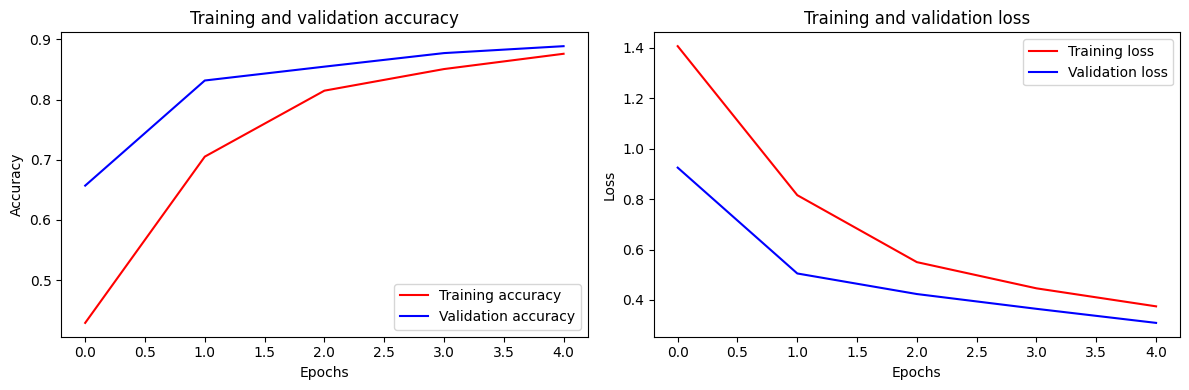

In [20]:
plot_training_history(history)

### Evaluate the model performance

Run the model on the test set and check the model's performance:

In [21]:
from packages.model_evaluation import evaluate_model

In [22]:
evaluate_model(model, test_mel_spec_ds)

Test accuracy:      83%
Test loss:          0.48542463779449463
Precision:          0.8483038255848078
Recall:             0.8309049079754601
F1-score:           0.83312634560073


## Confusion matrix

In [23]:
y_pred = model.predict(test_mel_spec_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_mel_spec_ds.map(lambda s,lab: lab)), axis=0)
label_names_slice = ['ddyo', 'emabega', 'kkono', 'mumaaso', 'unknown', 'yimirira']

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


In [24]:
from packages.model_evaluation import plot_confusion_matrix

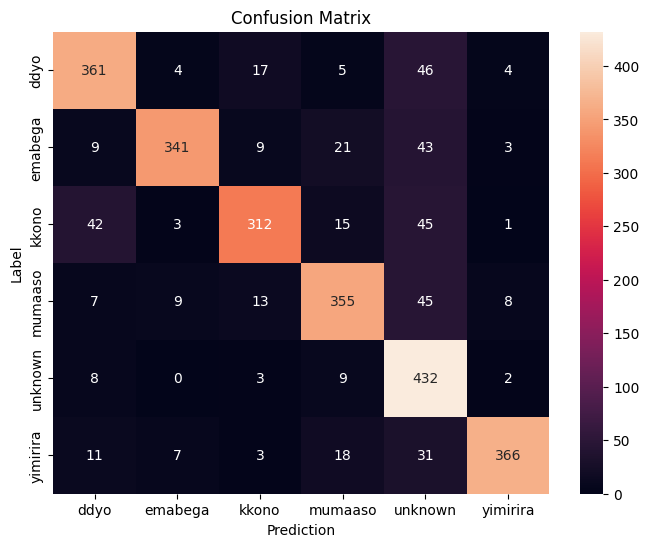

In [25]:
plot_confusion_matrix(y_true, y_pred, label_names_slice)

## save the Keras model

In [26]:
KERAS_MODEL_PATH = "model/Model_spec_1.keras"

In [27]:
model.save(KERAS_MODEL_PATH)
print('Model has been successfully saved')

Model has been successfully saved


## Size of the keras model

In [28]:
from packages.utils import get_and_convert_file_size

In [29]:
keras_model_size = get_and_convert_file_size(KERAS_MODEL_PATH, 'MB')

File size: 1.354 Megabytes
